In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables

#UNCLEAR WHAT THE ABOVE IS ASKING, all base needs is engine to work ; session helps with using sql functions

Base = automap_base()


In [6]:
Base.prepare(autoload_with=engine) 

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
##TEST
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19cc6c1e860>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1}

In [11]:
##TEST
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19cc202bca0>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [12]:
# Find the most recent date in the data set.
#Date is contained in the measurement table; sort by date? 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Query Date:  2016-08-23


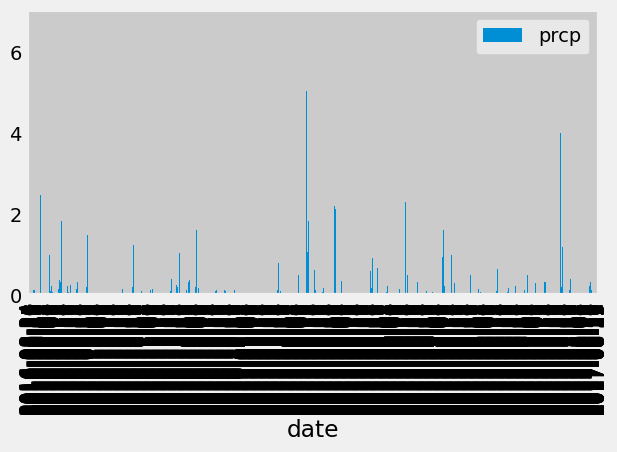

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

precip_16_17 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
#https://stackoverflow.com/questions/12047193/how-to-convert-sql-query-result-to-pandas-data-structure 

df = pd.DataFrame(precip_16_17, columns =['date', 'prcp'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
##FORMAT
df.plot.bar()
plt.tight_layout()
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
##INCORRECT SHOULD BE 2021
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#add to for loop and count? 
session.query(func.count(Station.id), Station.station).group_by(Station.station).all()


[(1, 'USC00511918'),
 (1, 'USC00513117'),
 (1, 'USC00514830'),
 (1, 'USC00516128'),
 (1, 'USC00517948'),
 (1, 'USC00518838'),
 (1, 'USC00519281'),
 (1, 'USC00519397'),
 (1, 'USC00519523')]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

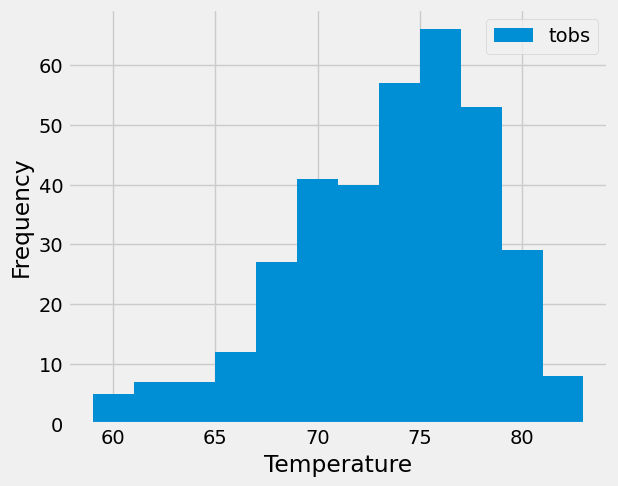

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()